# <div align="center">Machine Learning: 21 Blackjack</div>

<div style="text-align: center;">
  <img src="./recursos_notebooks/portada.jpg" width="800" height="450" style="object-fit: cover;" />
</div>

*Jorge Alonso Conde - Trabajo final Machine Learning*

# Importación del data set #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

#Windgets y botones
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
ds_blackjack = pd.read_csv("../data/blkjckhands.csv", nrows=200004) #menos registros

In [4]:
ds_blackjack.tail(20)

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
199984           4  Player5      3      8      9      0      0          20   
199985           5  Player6     10     11      0      0      0          21   
199986           0  Player1      4      2      2     10      0          18   
199987           1  Player2      7      3     10      0      0          20   
199988           2  Player3     10      3      0      6      0          19   
199989           3  Player4      9      4      0      4      0          17   
199990           4  Player5     11      1      5      0      0          17   
199991           5  Player6      8     10      0      0      0          18   
199992           0  Player1      7      5      0      1     10          23   
199993           1  Player2     11     10      0      0      0          21   
199994           2  Player3      6      7      0     10      0          23   
199995           3  Player4      1      4     10      1      2          18   
199996           4  Player5     10     10      0      0      0          20   
199997           5  Player6      2     10      0      2      8          22   
199998           0  Player1     10      9      0      0      0          19   
199999           1  Player2      9      3      0      7      0          19   
200000           2  Player3      1      5     10      3      0          19   
200001           3  Player4      2      7      6     10      0          25   
200002           4  Player5     11      8      0      0      0          19   
200003           5  Player6     10     10      0      0      0          20   

        dealcard1  dealcard2  ...  dealcard4  dealcard5  sumofdeal  blkjck  \
199984          4          5  ...          0          0         17   nowin   
199985          4          5  ...          0          0         17     Win   
199986         10         10  ...          0          0         20   nowin   
199987         10         10  ...          0          0         20   nowin   
199988         10         10  ...          0          0         20   nowin   
199989         10         10  ...          0          0         20   nowin   
199990         10         10  ...          0          0         20   nowin   
199991         10         10  ...          0          0         20   nowin   
199992         10         10  ...          0          0         20   nowin   
199993         10         10  ...          0          0         20     Win   
199994         10         10  ...          0          0         20   nowin   
199995         10         10  ...          0          0         20   nowin   
199996         10         10  ...          0          0         20   nowin   
199997         10         10  ...          0          0         20   nowin   
199998          7         10  ...          0          0         17   nowin   
199999          7         10  ...          0          0         17   nowin   
200000          7         10  ...          0          0         17   nowin   
200001          7         10  ...          0          0         17   nowin   
200002          7         10  ...          0          0         17   nowin   
200003          7         10  ...          0          0         17   nowin   

       winloss plybustbeat dlbustbeat plwinamt  dlwinamt  ply2cardsum  
199984     Win       Plwin       Beat       20         0           11  
199985     Win       Plwin       Beat       25         0           21  
199986    Loss        Beat      Dlwin        0        10            6  
199987    Push        Push       Push       10         0           10  
199988    Loss        Beat      Dlwin        0        10           13  
199989    Loss        Beat      Dlwin        0        10           13  
199990    Loss        Beat      Dlwin        0        10           12  
199991    Loss        Beat      Dlwin        0        10           18  
199992    Loss        Bust     PlBust        0        10           12  
199993    

# Estudio del Data Set #

#### Este estudio se centra en cómo juegan los jugadores y en mejorar la toma de decisiones durante la partida. Por lo tanto, se eliminarán las columnas que hacen referencia a las apuestas, ya que no son necesarias para este análisis. ####

In [5]:
ds_blackjack.head()

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0           0  Player1      7     10      0      0      0          17   
1           1  Player2     10      9      0      0      0          19   
2           2  Player3      9      8      0      0      0          17   
3           3  Player4      2     10      0      5      0          17   
4           4  Player5     10      2      0      5      0          17   

   dealcard1  dealcard2  ...  dealcard4  dealcard5  sumofdeal  blkjck winloss  \
0         10          8  ...          0          0         18   nowin    Loss   
1         10          8  ...          0          0         18   nowin     Win   
2         10          8  ...          0          0         18   nowin    Loss   
3         10          8  ...          0          0         18   nowin    Loss   
4         10          8  ...          0          0         18   nowin    Loss   

  plybustbeat dlbustbeat plwinamt  dlwinamt  ply2cardsum  
0        Beat      Dlwin        0        10           17  
1       Plwin       Beat       20         0           19  
2        Beat      Dlwin        0        10           17  
3        Beat      Dlwin        0        10           12  
4        Beat      Dlwin        0        10           12  

[5 rows x 21 columns]

In [6]:
ds_blackjack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200004 entries, 0 to 200003
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   200004 non-null  int64 
 1   PlayerNo     200004 non-null  object
 2   card1        200004 non-null  int64 
 3   card2        200004 non-null  int64 
 4   card3        200004 non-null  int64 
 5   card4        200004 non-null  int64 
 6   card5        200004 non-null  int64 
 7   sumofcards   200004 non-null  int64 
 8   dealcard1    200004 non-null  int64 
 9   dealcard2    200004 non-null  int64 
 10  dealcard3    200004 non-null  int64 
 11  dealcard4    200004 non-null  int64 
 12  dealcard5    200004 non-null  int64 
 13  sumofdeal    200004 non-null  int64 
 14  blkjck       200004 non-null  object
 15  winloss      200004 non-null  object
 16  plybustbeat  200004 non-null  object
 17  dlbustbeat   200004 non-null  object
 18  plwinamt     200004 non-null  int64 
 19  dl

In [7]:
ds_blackjack.describe()

Unnamed: 0          card1          card2          card3  \
count  200004.000000  200004.000000  200004.000000  200004.000000   
mean        2.500000       7.129147       7.086298       1.956026   
std         1.707829       2.996806       3.008780       3.533596   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       4.000000       0.000000   
50%         2.500000       8.000000       8.000000       0.000000   
75%         4.000000      10.000000      10.000000       2.000000   
max         5.000000      11.000000      11.000000      11.000000   

               card4          card5     sumofcards      dealcard1  \
count  200004.000000  200004.000000  200004.000000  200004.000000   
mean        2.352258       0.393777      18.917507       7.209906   
std         3.661872       1.739657       3.209495       2.974229   
min         0.000000       0.000000       9.000000       1.000000   
25%         0.000000       0.000000      17.000000       5.000000   
50%         0.000000       0.000000      19.000000       8.000000   
75%         4.000000       0.000000      21.000000      10.000000   
max        10.000000      10.000000      26.000000      11.000000   

           dealcard2      dealcard3      dealcard4      dealcard5  \
count  200004.000000  200004.000000  200004.000000  200004.000000   
mean        7.133767       4.364493       1.373043       0.225535   
std         2.986018       4.083142       3.033778       1.317447   
min         1.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         8.000000       4.000000       0.000000       0.000000   
75%        10.000000       9.000000       0.000000       0.000000   
max        11.000000      11.000000      10.000000      10.000000   

           sumofdeal       plwinamt       dlwinamt    ply2cardsum  
count  200004.000000  200004.000000  200004.000000  200004.000000  
mean       20.306744       9.755005       4.760305      14.215446  
std         2.555308       9.790661       4.994264       4.429589  
min        10.000000       0.000000       0.000000       2.000000  
25%        18.000000       0.000000       0.000000      12.000000  
50%        20.000000      10.000000       0.000000      14.000000  
75%        22.000000      20.000000      10.000000      18.000000  
max        26.000000      25.000000      10.000000      21.000000

### Data set: variables y descripción (ACTUALIZAR)

| Variable         | Traducción                        | Significado                                                                 |
|------------------|------------------------------------|------------------------------------------------------------------------------|
| `Unnamed: 0`     | Índice                             | Número de fila del dataset (índice automático del archivo CSV)              |
| `PlayerNo`       | Jugador N.º                        | Identificador del jugador (cadena de texto)                                 |
| `card1`          | Carta 1                            | Primera carta recibida por el jugador                                       |
| `card2`          | Carta 2                            | Segunda carta recibida por el jugador                                       |
| `card3`          | Carta 3                            | Tercera carta del jugador (si pide carta)                                   |
| `card4`          | Carta 4                            | Cuarta carta del jugador (si sigue pidiendo)                                |
| `card5`          | Carta 5                            | Quinta carta del jugador (última posible carta recibida)                    |
| `sumofcards`     | Suma de cartas jugador             | Suma total de las cartas del jugador                                        |
| `dealcard1`      | Carta crupier 1                    | Primera carta visible del crupier                                           |
| `dealcard2`      | Carta crupier 2                    | Segunda carta del crupier                                                   |
| `dealcard3`      | Carta crupier 3                    | Tercera carta del crupier (si pide carta)                                   |
| `dealcard4`      | Carta crupier 4                    | Cuarta carta del crupier (si sigue pidiendo)                                |
| `dealcard5`      | Carta crupier 5                    | Quinta carta del crupier (última posible)                                   |
| `sumofdeal`      | Suma de cartas crupier             | Suma total de las cartas del crupier                                        |
| `blkjck`         | Blackjack                          | Indica si hubo blackjack natural (21 con las dos primeras cartas)           |
| `winloss`        | Resultado                          | Resultado de la mano para el jugador (`Win`, `Loss`, `Push`)          |
| `plybustbeat`    | Jugador se pasó                    | Resultado de la partida para el jugador: Beat, DlBust, Plwin, Bust, Push                      |
| `dlbustbeat`     | Crupier se pasó                    | Resultado de la partida para el dealer: Dlwin, Bust, Beat, PlBust, Push                   |
| `ply2cardsum`    | Suma 2 primeras cartas jugador     | Suma de las primeras dos cartas del jugador                                 |



In [8]:
ds_blackjack["winloss"].value_counts()

winloss
Loss    95208
Win     86094
Push    18702
Name: count, dtype: int64

In [9]:
ds_blackjack["plybustbeat"].value_counts()

#Beat	= El jugador gana con una mano superior sin que nadie se pase de 21.
#DlBust	= El jugador gana porque el crupier se pasó de 21.
#Plwin	= El jugador gana con un blackjack natural (As + 10).
#Bust	= El jugador pierde porque se pasó de 21.
#Push	= Empate: el jugador y el crupier tienen el mismo total.

plybustbeat
Beat      59270
DlBust    48628
Plwin     37466
Bust      35938
Push      18702
Name: count, dtype: int64

In [10]:
ds_blackjack["dlbustbeat"].value_counts()

#Dlwin	El crupier gana con una mano superior sin que nadie se pase de 21.
#Bust	El crupier pierde porque se pasó de 21.
#Beat	El crupier gana porque el jugador se pasó de 21.
#PlBust	El jugador pierde por pasarse, lo que implica victoria para el crupier.
#Push	Empate: el crupier y el jugador tienen el mismo total.

dlbustbeat
Dlwin     59270
Bust      48628
Beat      37466
PlBust    35938
Push      18702
Name: count, dtype: int64

In [11]:
ds_blackjack["winloss"].value_counts()

winloss
Loss    95208
Win     86094
Push    18702
Name: count, dtype: int64

In [12]:
no_cuenta_bj = ds_blackjack[ds_blackjack["ply2cardsum"] != 21] 

conteo_sumofdeal_filtrado = no_cuenta_bj["sumofdeal"].value_counts().sort_index()

conteo_sumofdeal_filtrado


sumofdeal
10        6
11       12
12       53
13       67
14      124
15      194
16      330
17    27071
18    26441
19    25376
20    34032
21    23047
22    14068
23    12148
24    10725
25     9070
26     7691
Name: count, dtype: int64

# Limpieza y trasformación del Data Frame #

In [13]:
#Eliminamos columnas referente a apuestas

ds_blackjack = ds_blackjack.drop(["plwinamt", "dlwinamt"], axis=1)



In [14]:
# Suma dos primeras cartas del jugador
ds_blackjack = ds_blackjack.rename(columns= {"player_2cards_sum": "ply2cardsum"})

In [15]:
# número de cartas totales pedidas por el jugador (cuenta en una única fila, el numero de cartas que ha pedido el jugador)

ds_blackjack["ply_No_cards"] = ds_blackjack[["card1", "card2", "card3", "card4", "card5"]].ne(0).sum(axis=1) #.e(0) quiere decir not equal 0

# número de cartas totales pedidas por el dealer (cuenta en una única fila, el numero de cartas que ha pedido el dealer)

ds_blackjack["deal_No_cards"] = ds_blackjack[["dealcard1", "dealcard2", "dealcard3", "dealcard4", "dealcard5"]].ne(0).sum(axis=1)

In [16]:
# Suma total de cartas visibles en la mesa al empezar la partida (player vs crepier)

ds_blackjack["deal_2cards_sum"] = ds_blackjack[["dealcard1", "dealcard2"]].sum(axis=1)

In [17]:
# Suma total de cartas visibles en la mesa al empezar la partida (player vs crepier)

ds_blackjack["sum_3first_cards"] = ds_blackjack[["card1", "card2", "dealcard1"]].sum(axis=1)



Pasamos la variable winloss a numérica:

In [18]:
#trasformar las variables categoricas en numericas, la mas importante win, los, push

def  numeric_def (x):
    if x == "Loss":
        return 0
    if x == "Push":
        return 1
    if x == "Win":
        return 2
    

ds_blackjack["winloss_numeric"] = ds_blackjack["winloss"].apply(numeric_def)


Tabla de variable:

| Valor original | Significado          | Valor asignado |
| -------------- | -------------------- | -------------- |
| **Loss**       | Derrota del jugador  | 0              |
| **Push**       | Empate               | 1              |
| **Win**        | Victoria del jugador | 2              |

Pasamos la variable blkjck a numérica:

In [19]:
#Cambiamos la columna blkjck a numerica (esta categorica indica si el jugador tiene un 21 únicamente con dos cartas)

print(ds_blackjack["blkjck"].describe())
print("----")
print(ds_blackjack["blkjck"].value_counts())

count     200004
unique         2
top        nowin
freq      190455
Name: blkjck, dtype: object
----
blkjck
nowin    190455
Win        9549
Name: count, dtype: int64


In [20]:
# Creamos la función y la aplicamos en un nueva columna

def blkjck_def (x):
    if x == "nowin":
        return 0
    if x == "Win":
        return 1
    
ds_blackjack["blkjck_numeric"] = ds_blackjack["blkjck"].apply(blkjck_def)

Tabla de variable:

| Valor original | Significado                        | Valor asignado |
| -------------- | ---------------------------------- | -------------- |
| **nowin**      | No se ganó por blackjack           | 0              |
| **Win**        | Victoria del jugador por blackjack | 1              |


Pasamos la variable plybustbeat a numerica:

In [21]:
#Entendemos como se compora la columna plybustbeat

print(ds_blackjack["plybustbeat"].describe())
print("----")
print(ds_blackjack["plybustbeat"].value_counts())

count     200004
unique         5
top         Beat
freq       59270
Name: plybustbeat, dtype: object
----
plybustbeat
Beat      59270
DlBust    48628
Plwin     37466
Bust      35938
Push      18702
Name: count, dtype: int64


In [22]:
# Creamos la columna en formato numerica

def plybustbeat_def (x):
    if x == "Push":
        return 0
    if x == "Plwin":
        return 1
    if x == "DlBust":
        return 2
    if x == "Beat":
        return 3
    if x == "Bust":
        return 4
    
ds_blackjack["plybustbeat_numeric"] = ds_blackjack["plybustbeat"].apply(plybustbeat_def)

Tabla de variable:

| Valor original | Significado                      | Valor asignado |
| -------------- | -------------------------------- | -------------- |
| **Push**       | Empate                           | 0              |
| **Plwin**      | Gana el jugador (mejor mano)     | 1              |
| **DlBust**     | Gana el jugador (dealer se pasa) | 2              |
| **Beat**       | Gana el dealer (mejor mano)      | 3              |
| **Bust**       | Pierde el jugador (se pasa)      | 4              |

In [23]:
ds_blackjack

Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0                0  Player1      7     10      0      0      0          17   
1                1  Player2     10      9      0      0      0          19   
2                2  Player3      9      8      0      0      0          17   
3                3  Player4      2     10      0      5      0          17   
4                4  Player5     10      2      0      5      0          17   
...            ...      ...    ...    ...    ...    ...    ...         ...   
199999           1  Player2      9      3      0      7      0          19   
200000           2  Player3      1      5     10      3      0          19   
200001           3  Player4      2      7      6     10      0          25   
200002           4  Player5     11      8      0      0      0          19   
200003           5  Player6     10     10      0      0      0          20   

        dealcard1  dealcard2  ...  plybustbeat  dlbustbeat  ply2cardsum  \
0              10          8  ...         Beat       Dlwin           17   
1              10          8  ...        Plwin        Beat           19   
2              10          8  ...         Beat       Dlwin           17   
3              10          8  ...         Beat       Dlwin           12   
4              10          8  ...         Beat       Dlwin           12   
...           ...        ...  ...          ...         ...          ...   
199999          7         10  ...        Plwin        Beat           12   
200000          7         10  ...        Plwin        Beat            6   
200001          7         10  ...         Bust      PlBust            9   
200002          7         10  ...        Plwin        Beat           19   
200003          7         10  ...        Plwin        Beat           20   

        ply_No_cards deal_No_cards deal_2cards_sum sum_3first_cards  \
0                  2             2              18               27   
1                  2             2              18               29   
2                  2             2              18               27   
3                  3             2              18               22   
4                  3             2              18               22   
...              ...           ...             ...              ...   
199999             3             2              17               19   
200000             4             2              17               13   
200001             4             2              17               16   
200002             2             2              17               26   
200003             2             2              17               27   

       winloss_numeric  blkjck_numeric  plybustbeat_numeric  
0                    0               0                    3  
1                    2               0                    1  
2                    0               0                    3  
3                    0               0                    3  
4                    0               0                    3  
...                ...             ...                  ...  
199999               2               0                    1  
200000               2               0                    1  
200001               0               0                    4  
200002               2               0                    1  
200003               2               0                    1  

[200004 rows x 26 columns]

In [24]:
ds_blackjack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200004 entries, 0 to 200003
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           200004 non-null  int64 
 1   PlayerNo             200004 non-null  object
 2   card1                200004 non-null  int64 
 3   card2                200004 non-null  int64 
 4   card3                200004 non-null  int64 
 5   card4                200004 non-null  int64 
 6   card5                200004 non-null  int64 
 7   sumofcards           200004 non-null  int64 
 8   dealcard1            200004 non-null  int64 
 9   dealcard2            200004 non-null  int64 
 10  dealcard3            200004 non-null  int64 
 11  dealcard4            200004 non-null  int64 
 12  dealcard5            200004 non-null  int64 
 13  sumofdeal            200004 non-null  int64 
 14  blkjck               200004 non-null  object
 15  winloss              200004 non-nu

In [25]:
ds_blackjack.describe()

Unnamed: 0          card1          card2          card3  \
count  200004.000000  200004.000000  200004.000000  200004.000000   
mean        2.500000       7.129147       7.086298       1.956026   
std         1.707829       2.996806       3.008780       3.533596   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       5.000000       4.000000       0.000000   
50%         2.500000       8.000000       8.000000       0.000000   
75%         4.000000      10.000000      10.000000       2.000000   
max         5.000000      11.000000      11.000000      11.000000   

               card4          card5     sumofcards      dealcard1  \
count  200004.000000  200004.000000  200004.000000  200004.000000   
mean        2.352258       0.393777      18.917507       7.209906   
std         3.661872       1.739657       3.209495       2.974229   
min         0.000000       0.000000       9.000000       1.000000   
25%         0.000000       0.000000      17.000000       5.000000   
50%         0.000000       0.000000      19.000000       8.000000   
75%         4.000000       0.000000      21.000000      10.000000   
max        10.000000      10.000000      26.000000      11.000000   

           dealcard2      dealcard3  ...      dealcard5      sumofdeal  \
count  200004.000000  200004.000000  ...  200004.000000  200004.000000   
mean        7.133767       4.364493  ...       0.225535      20.306744   
std         2.986018       4.083142  ...       1.317447       2.555308   
min         1.000000       0.000000  ...       0.000000      10.000000   
25%         5.000000       0.000000  ...       0.000000      18.000000   
50%         8.000000       4.000000  ...       0.000000      20.000000   
75%        10.000000       9.000000  ...       0.000000      22.000000   
max        11.000000      11.000000  ...      10.000000      26.000000   

         ply2cardsum   ply_No_cards  deal_No_cards  deal_2cards_sum  \
count  200004.000000  200004.000000  200004.000000    200004.000000   
mean       14.215446       2.697991       2.891342        14.343673   
std         4.429589       0.764366       0.809928         4.388708   
min         2.000000       2.000000       2.000000         2.000000   
25%        12.000000       2.000000       2.000000        12.000000   
50%        14.000000       3.000000       3.000000        14.000000   
75%        18.000000       3.000000       3.000000        18.000000   
max        21.000000       5.000000       5.000000        21.000000   

       sum_3first_cards  winloss_numeric  blkjck_numeric  plybustbeat_numeric  
count     200004.000000    200004.000000   200004.000000        200004.000000  
mean          21.425351         0.954431        0.047744             2.281374  
std            5.331372         0.951010        0.213225             1.223636  
min            3.000000         0.000000        0.000000             0.000000  
25%           18.000000         0.000000        0.000000             1.000000  
50%           22.000000         1.000000        0.000000             2.000000  
75%           25.000000         2.000000        0.000000             3.000000  
max           32.000000         2.000000        1.000000             4.000000  

[8 rows x 21 columns]

#### Careación de nuevas columnas calculadas y renombrar columnas del data set ####

# EDA: Exploratory Data Analysis #

In [26]:
#Total partidas ganadas por cada jugador

win_counts = {} #diccionario que va a recoger todas las victorias de cada jugador

for i in range(1, 7):
    player= f"Player{i}"
    wins= ds_blackjack[(ds_blackjack["PlayerNo"]==player) & (ds_blackjack["winloss"]=="Win")].shape[0]

    win_counts[player]= wins #añadimos al diccionario el jugador como indice y como valor las partidas ganadas

wins_player1 = win_counts['Player1'] #asignamos a cada variable las victorias de dicho jugador
wins_player2 = win_counts['Player2']
wins_player3 = win_counts['Player3']
wins_player4 = win_counts['Player4']
wins_player5 = win_counts['Player5']
wins_player6 = win_counts['Player6']
wins_total = wins_player1 + wins_player2 + wins_player3 + wins_player4 + wins_player5 + wins_player6

print("wins player1", wins_player1)
print("wins player2", wins_player2)
print("wins player3", wins_player3)
print("wins player4", wins_player4)
print("wins player5", wins_player5)
print("wins player6", wins_player6)
print("total wins", wins_total)

wins player1 14386
wins player2 14329
wins player3 14374
wins player4 14366
wins player5 14272
wins player6 14367
total wins 86094


In [27]:
#Total partidas perdidas por cada jugador

loss_counts = {} #diccionario que va a recoger todas las derrotas de cada jugador

for i in range(1, 7):
    player= f"Player{i}"
    loss= ds_blackjack[(ds_blackjack["PlayerNo"]==player) & (ds_blackjack["winloss"]=="Loss")].shape[0]

    loss_counts[player]= loss #añadimos al diccionario el jugador como indice y como valor las partidas perdidas

loss_player1 = loss_counts['Player1'] #asignamos a cada variable las derrotas de dicho jugador
loss_player2 = loss_counts['Player2']
loss_player3 = loss_counts['Player3']
loss_player4 = loss_counts['Player4']
loss_player5 = loss_counts['Player5']
loss_player6 = loss_counts['Player6']
loss_total = loss_player1 + loss_player2 + loss_player3 + loss_player4 + loss_player5 + loss_player6

print("loss player1", loss_player1)
print("loss player2", loss_player2)
print("loss player3", loss_player3)
print("loss player4", loss_player4)
print("loss player5", loss_player5)
print("loss player6", loss_player6)
print("total loss", loss_total)

loss player1 15799
loss player2 15880
loss player3 15919
loss player4 15924
loss player5 15905
loss player6 15781
total loss 95208


In [28]:
# Total partidas empatadas por cada jugador (ahora usando "Push")

push_counts = {}  # Diccionario que va a recoger todos los empates de cada jugador

for i in range(1, 7):
    player = f"Player{i}"
    push = ds_blackjack[(ds_blackjack["PlayerNo"] == player) & (ds_blackjack["winloss"] == "Push")].shape[0]
    
    push_counts[player] = push  # Añadimos al diccionario el jugador como clave y las partidas empatadas como valor

# Asignamos a cada variable los empates de dicho jugador
push_player1 = push_counts['Player1']
push_player2 = push_counts['Player2']
push_player3 = push_counts['Player3']
push_player4 = push_counts['Player4']
push_player5 = push_counts['Player5']
push_player6 = push_counts['Player6']
push_total = push_player1 + push_player2 + push_player3 + push_player4 + push_player5 + push_player6

# Mostramos los resultados
print("Push Player1:", push_player1)
print("Push Player2:", push_player2)
print("Push Player3:", push_player3)
print("Push Player4:", push_player4)
print("Push Player5:", push_player5)
print("Push Player6:", push_player6)
print("total push", push_total)

Push Player1: 3149
Push Player2: 3125
Push Player3: 3041
Push Player4: 3044
Push Player5: 3157
Push Player6: 3186
total push 18702


In [29]:
# % total de partidas ganadas, perdidas y empatadas para los jugadores

total_losses_per = loss_total / (loss_total + push_total + wins_total)
total_push_per = push_total / (loss_total + push_total + wins_total)
total_wins_per = wins_total / (loss_total + push_total + wins_total)

print("% partidas ganadas por los jugadores: ", total_wins_per)
print("% partidas perdidas por los jugadores: ", total_losses_per)
print("% partidas empatadas por los jugadores: ", total_push_per)

% partidas ganadas por los jugadores:  0.43046139077218454
% partidas perdidas por los jugadores:  0.4760304793904122
% partidas empatadas por los jugadores:  0.09350812983740325


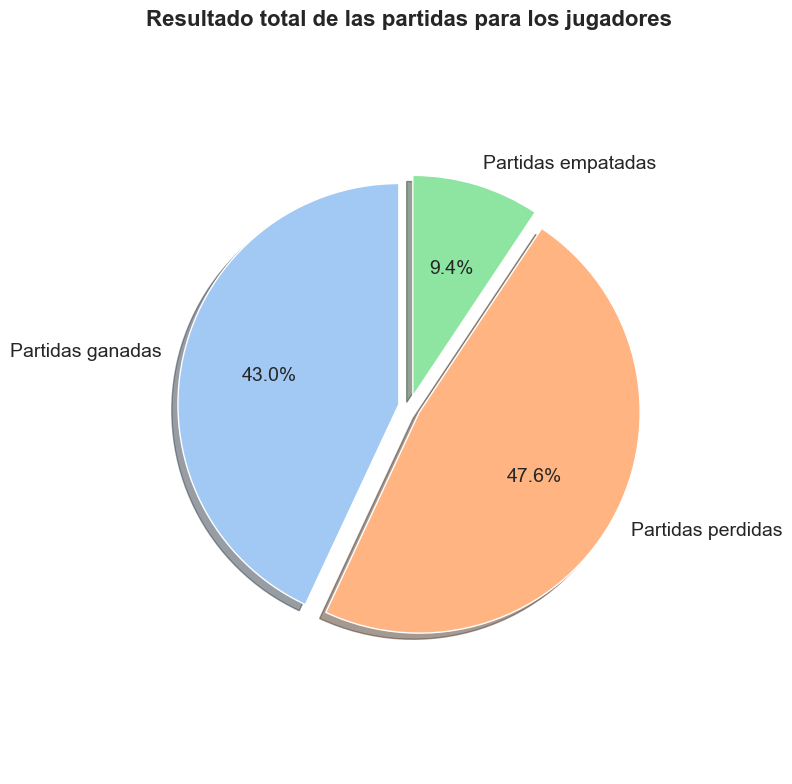

In [ ]:
# Aplicamos estilo de seaborn a matplotlib
sns.set_theme(style="white")

# Datos
labels = ['Partidas ganadas', 'Partidas perdidas', 'Partidas empatadas']
sizes = [total_wins_per, total_losses_per, total_push_per]
colors = sns.color_palette("pastel")[0:3]  # Paleta de colores pastel
explode = (0.05, 0.05, 0.05)  # separación para cada porción

# Creación de gráfico
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14}
)
plt.title('Resultado total de las partidas para los jugadores', fontsize=16, weight='bold')
plt.axis('equal')  # Círculo perfecto
plt.tight_layout()
plt.show()


In [31]:
#En función de la suma total de cartas de la partida por parte del jugador, ver las veces que se ha ganado, perdido o empatado
import plotly.express as px

orden_resultado = ["Loss", "Win", "Push"]
colores_resultado = {
    "Loss": "#636EFA",  # azul
    "Win": "#EF553B",   # rojo
    "Push": "#00CC96"   # verde
}

# Agrupar por las 3 cartas iniciales y resultado
grouped = ds_blackjack.groupby(["sumofcards", "winloss"]).size().reset_index(name="count")

# Forzar tipo categoría con orden específico
grouped["winloss"] = pd.Categorical(grouped["winloss"], categories=orden_resultado, ordered=True)

# Crear gráfica
fig = px.scatter(
    grouped,
    x="sumofcards",
    y="winloss",
    size="count",
    size_max=50,
    color="winloss",
    color_discrete_map=colores_resultado,
    category_orders={"winloss": orden_resultado},
    title="Dispersión: suma de cartas totales del jugador vs resultado",
    labels={
        "sumofcards": "Suma total de las cartas del jugador",
        "winloss": "Resultado",
        "count": "Cantidad de ocurrencias"
    },
)

fig.show()


In [32]:
# 1. Agrupar y contar ocurrencias
conteo_sumofcards = ds_blackjack.groupby(["sumofcards", "winloss"]).size().reset_index(name="count")

# 2. Calcular el total por cada valor de sumofcards
conteo_sumofcards["total"] = conteo_sumofcards.groupby("sumofcards")["count"].transform("sum")

# 3. Calcular el porcentaje
conteo_sumofcards["percentage"] = (conteo_sumofcards["count"] / conteo_sumofcards["total"] * 100).round(2)

# 4. Pivotear la tabla para ver los porcentajes
tabla_porcentajes_sumofcards = conteo_sumofcards.pivot(
    index="sumofcards", columns="winloss", values="percentage"
).fillna(0)

# 5. Convertir a DataFrame con índice plano
df_porcentajes_sumofcards = tabla_porcentajes_sumofcards.reset_index()

df_porcentajes_sumofcards


winloss  sumofcards    Loss   Push    Win
0                 9   66.67   0.00  33.33
1                10   87.50   0.00  12.50
2                11   60.87   0.00  39.13
3                12   58.74   0.06  41.21
4                13   61.14   0.13  38.73
5                14   59.83   0.12  40.05
6                15   60.15   0.26  39.59
7                16   60.52   0.43  39.05
8                17   58.54  14.30  27.17
9                18   44.23  14.01  41.76
10               19   31.33  13.49  55.18
11               20   12.20  18.54  69.25
12               21    0.00  11.88  88.12
13               22  100.00   0.00   0.00
14               23  100.00   0.00   0.00
15               24  100.00   0.00   0.00
16               25  100.00   0.00   0.00
17               26  100.00   0.00   0.00

In [33]:
#En función de la suma de las 3 primeras cartas (2 del jugador y 1 del dealer visible para el jugador), ver las veces que se ha ganado, perdido o empatado

#formato a la leyenda y burbujas
orden_resultado = ["Loss", "Win", "Push"]

colores_resultado = {
    "Loss": "#636EFA",  # azul
    "Win": "#EF553B",   # rojo
    "Push": "#00CC96"   # verde
}

# Agrupar por las 3 cartas iniciales y resultado
grouped = ds_blackjack.groupby(["sum_3first_cards", "winloss"]).size().reset_index(name="count")

# Forzar tipo categoría con orden específico
grouped["winloss"] = pd.Categorical(grouped["winloss"], categories=orden_resultado, ordered=True)

# Crear gráfica
fig = px.scatter(
    grouped,
    x="sum_3first_cards",
    y="winloss",
    size="count",
    size_max=50,
    color="winloss",
    color_discrete_map=colores_resultado,
    category_orders={"winloss": orden_resultado},
    title="Dispersión: suma de 3 primeras cartas (2 jugador + 1 dealer) vs resultado",
    labels={
        "sum_3first_cards": "Suma de 3 primeras cartas",
        "winloss": "Resultado",
        "count": "Cantidad de ocurrencias"
    },
)

fig.show()


In [34]:
#En función de la suma de las 2 primeras cartas del jugador, ver las veces que se ha ganado, perdido o empatado

#formato a la leyenda y burbujas
orden_resultado = ["Loss", "Win", "Push"]

colores_resultado = {
    "Loss": "#636EFA",  # azul
    "Win": "#EF553B",   # rojo
    "Push": "#00CC96"   # verde
}

# Agrupar por las 3 cartas iniciales y resultado
grouped = ds_blackjack.groupby(["ply2cardsum", "winloss"]).size().reset_index(name="count")

# Forzar tipo categoría con orden específico
grouped["winloss"] = pd.Categorical(grouped["winloss"], categories=orden_resultado, ordered=True)

# Crear gráfica
fig = px.scatter(
    grouped,
    x="ply2cardsum",
    y="winloss",
    size="count",
    size_max=50,
    color="winloss",
    color_discrete_map=colores_resultado,
    category_orders={"winloss": orden_resultado},
    title="Dispersión: las 2 primeras cartas del jugador vs resultado",
    labels={
        "ply2cardsum": "Suma de 2 primeras cartas del jugador",
        "winloss": "Resultado",
        "count": "Cantidad de ocurrencias"
    },
)

fig.show()

In [35]:
# 1. Agrupar y contar ocurrencias
conteo = ds_blackjack.groupby(["ply2cardsum", "winloss"]).size().reset_index(name="count")

# 2. Calcular el total por cada valor de ply2cardsum
conteo["total"] = conteo.groupby("ply2cardsum")["count"].transform("sum")

# 3. Calcular el porcentaje
conteo["percentage"] = (conteo["count"] / conteo["total"] * 100).round(2)

# 4. Pivotear la tabla para que quede más clara (opcional pero útil)
tabla_porcentajes = conteo.pivot(index="ply2cardsum", columns="winloss", values="percentage").fillna(0)

# 5. Pasar tabla a data frame
ds_porcentajes = tabla_porcentajes.reset_index()
ds_porcentajes


winloss  ply2cardsum   Loss   Push    Win
0                  2  63.69   6.50  29.81
1                  3  65.08   3.44  31.49
2                  4  62.03   4.96  33.01
3                  5  61.80   6.44  31.76
4                  6  61.96   6.12  31.91
5                  7  58.27   9.56  32.18
6                  8  50.24   9.47  40.29
7                  9  44.92  10.15  44.92
8                 10  37.70  11.12  51.18
9                 11  36.82   9.93  53.25
10                12  62.06   5.79  32.15
11                13  62.95   5.34  31.71
12                14  63.65   5.11  31.25
13                15  64.57   4.47  30.96
14                16  65.37   4.77  29.86
15                17  55.11  13.93  30.95
16                18  43.10  13.89  43.01
17                19  30.27  13.11  56.62
18                20  11.95  17.83  70.22
19                21   0.00  11.74  88.26

In [36]:
#En función de la suma total de cartas de la partida por parte del jugador, ver las veces que se ha ganado, perdido o empatado

# Agrupar por sumofcards y winloss para contar cuántas veces aparece cada combinación
grouped = ds_blackjack.groupby(["sumofcards", "winloss"]).size().reset_index(name="count")

# Crear scatter plot con tamaño proporcional al número de ocurrencias
fig = px.scatter(
    grouped,
    x="sumofcards",
    y="winloss",
    size="count",            
    color="winloss",        
    title="Dispersión: suma de cartas vs resultado",
    labels={
        "sumofcards": "Suma de Cartas",
        "winloss": "Resultado",
        "count": "Cantidad de ocurrencias"
    },
)

fig.show()

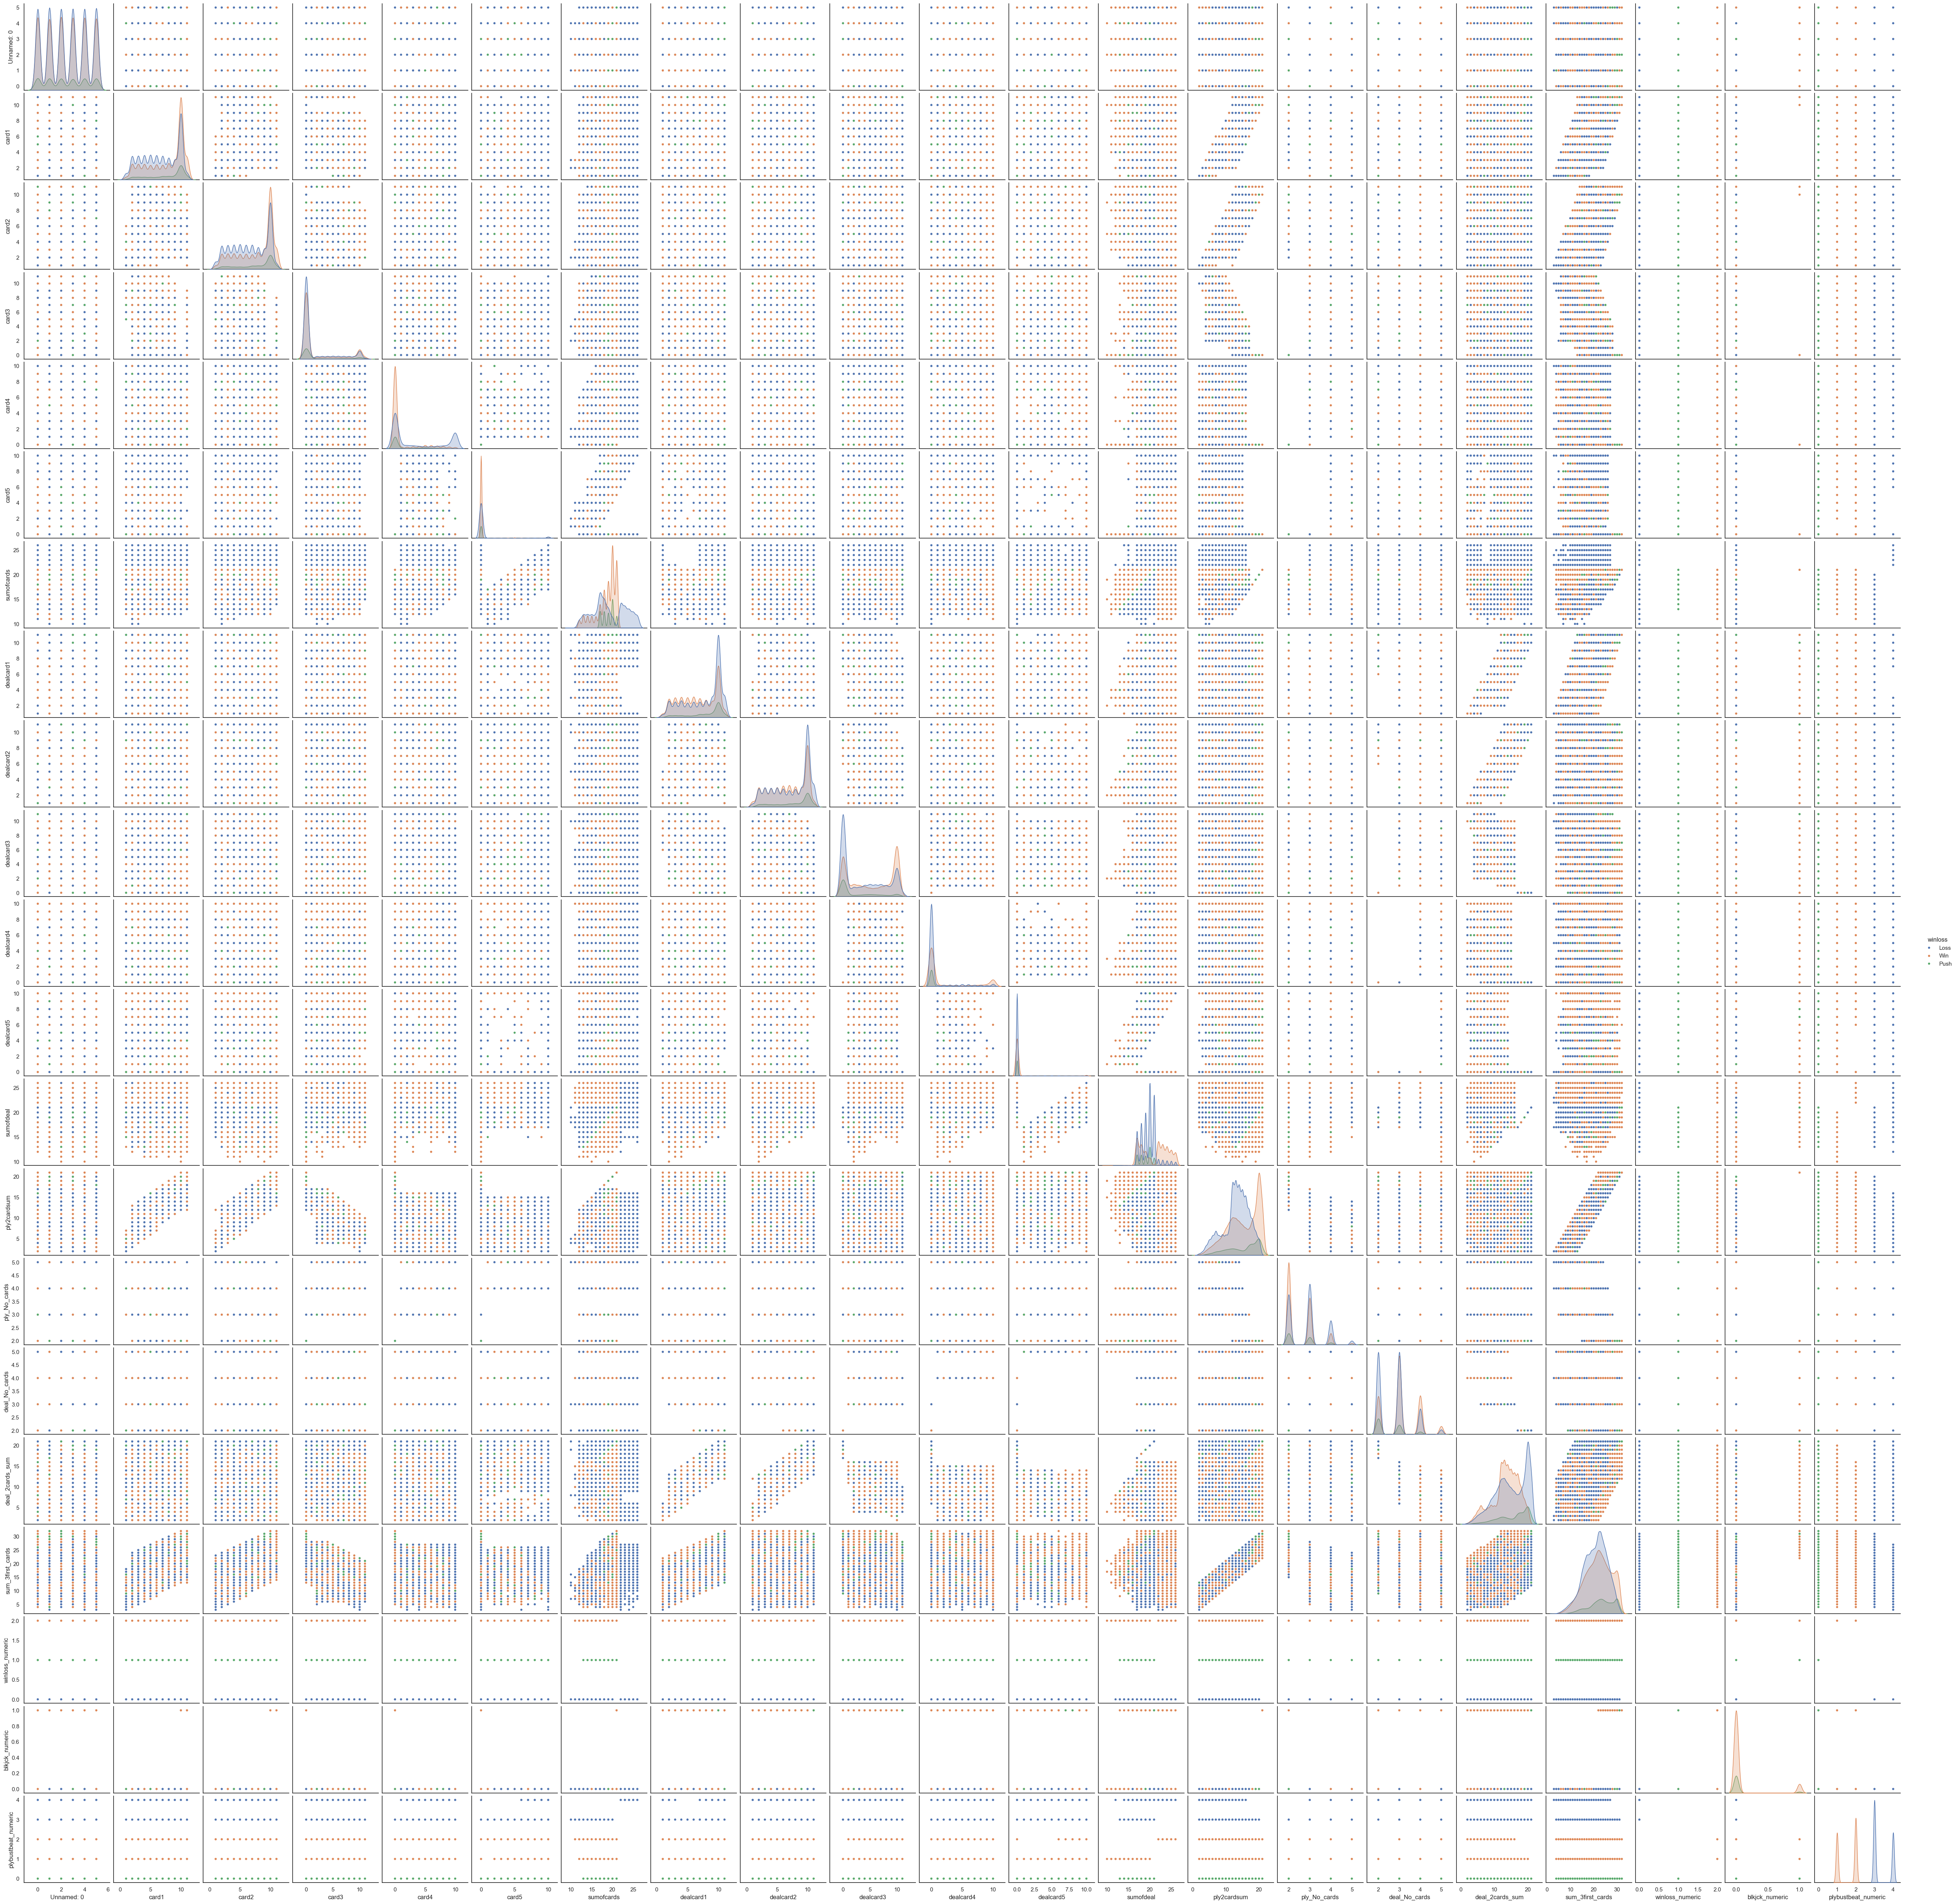

In [66]:
sns.pairplot(ds_blackjack.sample(frac=0.5, random_state=42), plot_kws={'s': 20, 'alpha': 1}, hue="winloss") # aññadir despues de black jack: .sample(frac=0.5, random_state=42)

<Axes: >

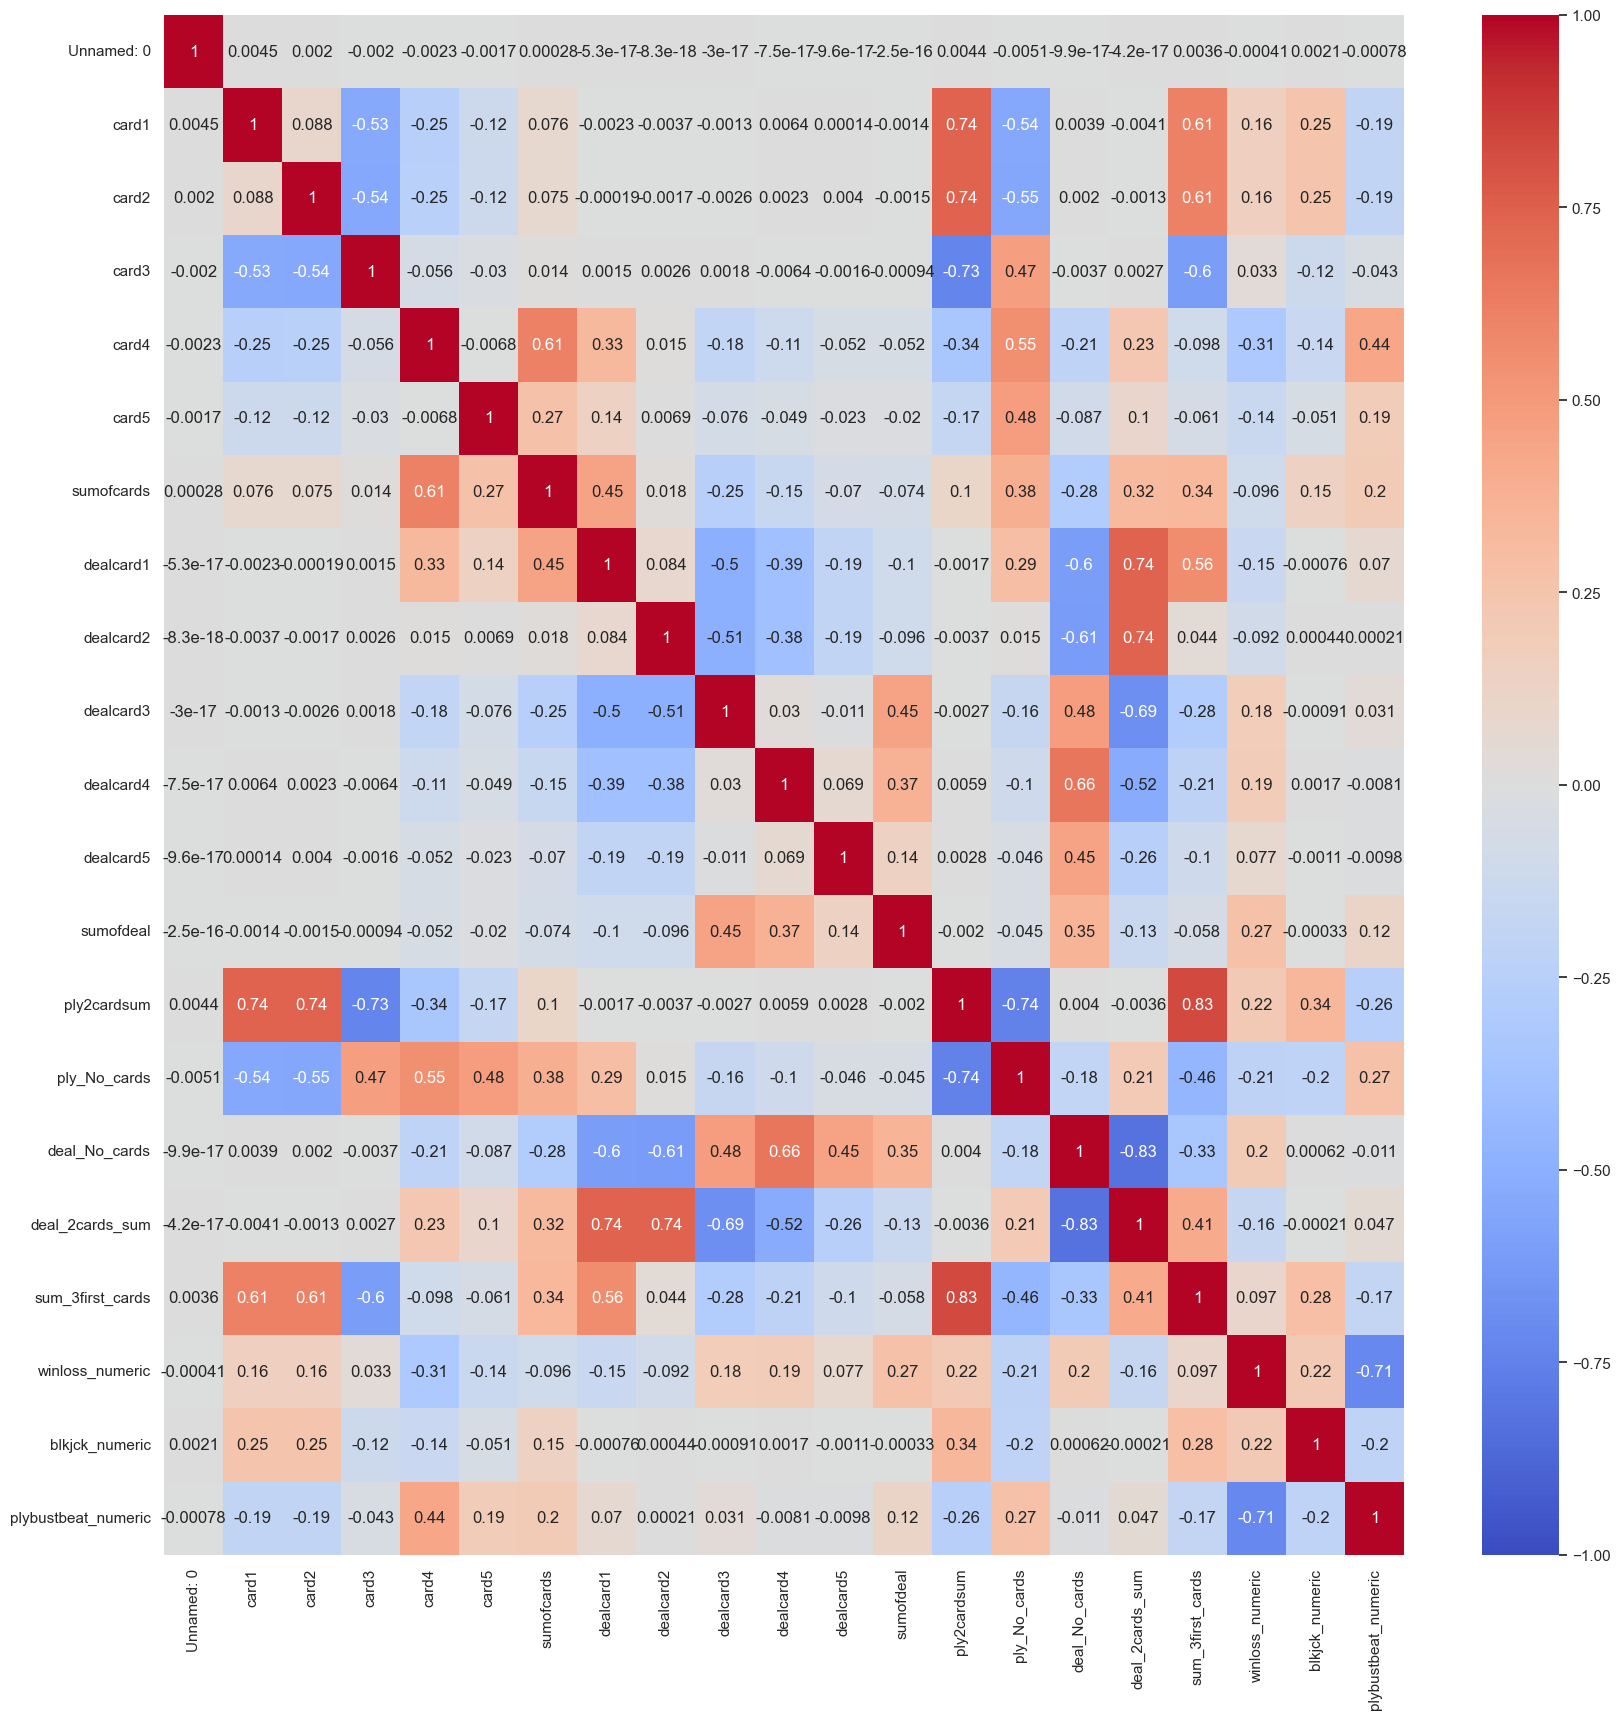

In [67]:
plt.figure(figsize=(20, 20))
sns.heatmap(ds_blackjack.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1, vmax=1)